In [1]:
import pandas
import numpy

from matplotlib import pyplot
%matplotlib inline

import seaborn
seaborn.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
def null_check_train(_feature):
    print('Training dataframe feature [{}] has any nulls or missing values: {}\n'.format(_feature, _df_train[_feature].isnull().any()))

def null_check_test(_feature):
    print('Test dataframe feature [{}] has any nulls or missing values: {}\n'.format(_feature, _df_test[_feature].isnull().any()))
    
def null_check(_feature):
    null_check_train(_feature)
    null_check_test(_feature)

def grid_feature(_feature):
    return _df_train[[_feature, 'Survived']].groupby([_feature], as_index=False).mean().sort_values(by=[_feature,'Survived'])

def grid_feature_hue(_feature):
    return _df_train[[_feature, 'Sex', 'Survived']].groupby([_feature,'Sex'], as_index=False).mean().sort_values(by=[_feature,'Sex'])

def grid(_feature):
    print('{}\n\n\n{}'.format(grid_feature(_feature), grid_feature_hue(_feature)))
    
def plot_feature(_feature):
    seaborn.factorplot(x=_feature, y='Survived', data = _df_train, size = 4, aspect = 2)

def plot_feature_hue(_feature):
    seaborn.factorplot(x=_feature, y='Survived', hue='Sex', data = _df_train, size = 4, aspect = 2)

def view_feature(_feature):
    null_check(_feature)
    grid(_feature)
    plot_feature(_feature)
    plot_feature_hue(_feature)
    
def print_shape():
    print('_df_train: {}, _df_test: {}, _df_combine[0]:{}, _df_combine[1]:{}'.format(_df_train.shape, _df_test.shape, _df_combine[0].shape, _df_combine[1].shape))

def print_ndim_array(_array):
    print(_array[:5,:], len(_array), type(_array), _array.shape, _array.ndim, _array.dtype.name)

def print_1dim_array(_array):
    print(_array[:5], len(_array), type(_array), _array.shape, _array.ndim, _array.dtype.name)

In [3]:
_df_train = pandas.read_csv('./train.csv')

In [4]:
_df_test = pandas.read_csv('./test.csv')

In [5]:
_df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
_df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
_df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
_df_train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Connolly, Miss. Kate",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
_df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
_df_test.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Connolly, Miss. Kate",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [13]:
_df_combine = [_df_train, _df_test]

In [14]:
# Feature Selection & Engineering

In [15]:
# Passengerid removal

In [16]:
print_shape()
_df_train = _df_train.drop('PassengerId', axis = 1)
#_df_test = _df_test.drop('PassengerId', axis = 1)
_df_combine = [_df_train, _df_test]
print_shape()

_df_train: (891, 12), _df_test: (418, 11), _df_combine[0]:(891, 12), _df_combine[1]:(418, 11)
_df_train: (891, 11), _df_test: (418, 11), _df_combine[0]:(891, 11), _df_combine[1]:(418, 11)


In [17]:
# Pclass 

Training dataframe feature [Pclass] has any nulls or missing values: False

Test dataframe feature [Pclass] has any nulls or missing values: False

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


   Pclass     Sex  Survived
0       1  female  0.968085
1       1    male  0.368852
2       2  female  0.921053
3       2    male  0.157407
4       3  female  0.500000
5       3    male  0.135447


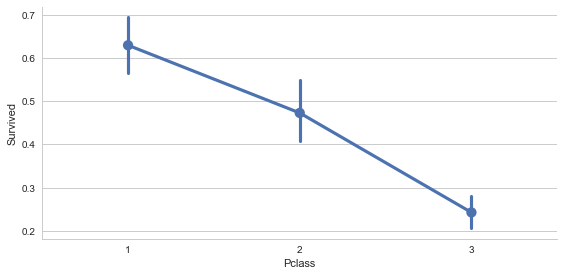

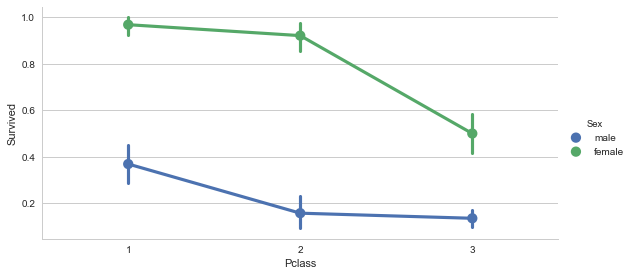

In [18]:
view_feature('Pclass')

In [19]:
# Name

In [20]:
for _df in _df_combine:
    _df['Title'] = _df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [21]:
pandas.crosstab(_df_train['Title'], _df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
pandas.crosstab(_df_test['Title'], _df_test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [23]:
for _df in _df_combine:
    _df['Title'] = _df['Title'].replace('Mlle', 'Miss')
    _df['Title'] = _df['Title'].replace('Ms', 'Miss')
    _df['Title'] = _df['Title'].replace('Mme', 'Mrs')

In [24]:
_title_map = {'Master': 1, 'Miss': 2, 'Mrs': 3, 'Mr': 4}
for _df in _df_combine:
    _df['Title'] = _df['Title'].map(_title_map)
    _df['Title'] = _df['Title'].fillna(5)

In [25]:
pandas.crosstab(_df_train['Title'], _df_train['Sex'])

Sex,female,male
Title,,
1.0,0,40
2.0,185,0
3.0,126,0
4.0,0,517
5.0,3,20


In [26]:
pandas.crosstab(_df_test['Title'], _df_test['Sex'])

Sex,female,male
Title,,
1.0,0,21
2.0,79,0
3.0,72,0
4.0,0,240
5.0,1,5


Training dataframe feature [Title] has any nulls or missing values: False

Test dataframe feature [Title] has any nulls or missing values: False

   Title  Survived
0    1.0  0.575000
1    2.0  0.702703
2    3.0  0.793651
3    4.0  0.156673
4    5.0  0.347826


   Title     Sex  Survived
0    1.0    male  0.575000
1    2.0  female  0.702703
2    3.0  female  0.793651
3    4.0    male  0.156673
4    5.0  female  1.000000
5    5.0    male  0.250000


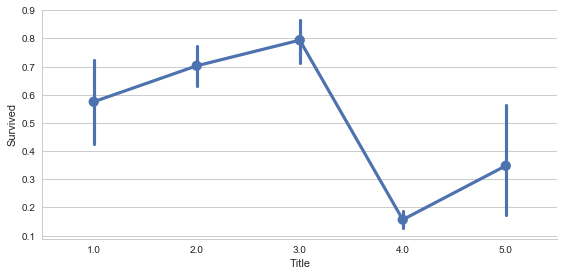

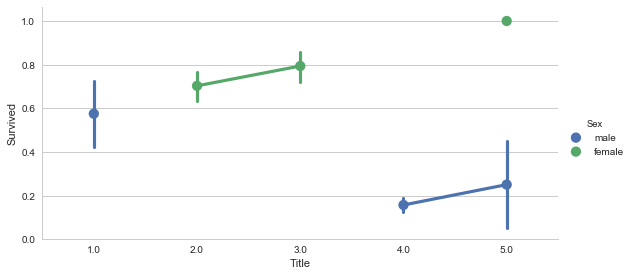

In [27]:
view_feature('Title')

In [28]:
print_shape()
_df_train = _df_train.drop('Name', axis = 1)
_df_test = _df_test.drop('Name', axis = 1)
_df_combine = [_df_train, _df_test]
print_shape()

_df_train: (891, 12), _df_test: (418, 12), _df_combine[0]:(891, 12), _df_combine[1]:(418, 12)
_df_train: (891, 11), _df_test: (418, 11), _df_combine[0]:(891, 11), _df_combine[1]:(418, 11)


In [29]:
# Sex

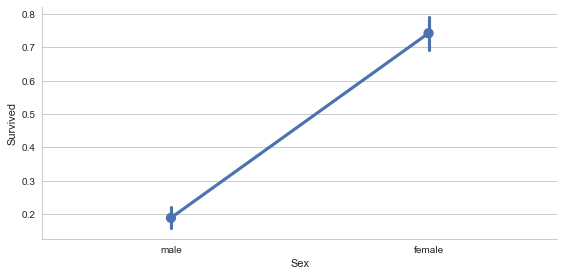

In [30]:
seaborn.factorplot('Sex', 'Survived', data = _df_train, size = 4, aspect = 2)

In [31]:
print(_df_train['Sex'].isnull().any())
print(_df_test['Sex'].isnull().any())

False
False


In [32]:
for _df in _df_combine:
    _df['Sex'] = _df['Sex'].map({'male':0, 'female':1}).astype(int)

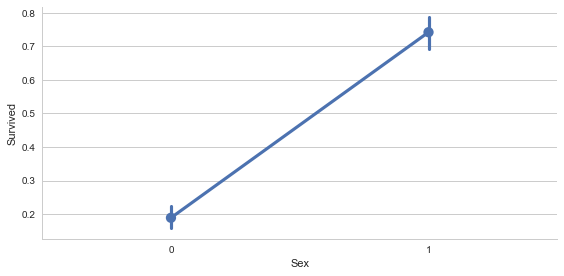

In [33]:
seaborn.factorplot('Sex', 'Survived', data = _df_train, size = 4, aspect = 2)

In [34]:
print(_df_train['Sex'].isnull().any())
print(_df_test['Sex'].isnull().any())

False
False


In [35]:
_df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [36]:
# Age

In [37]:
_title_age_train = _df_train[['Title', 'Age']].groupby(['Title'], as_index=False).mean().sort_values(by='Title')
print(type(_title_age_train))
_title_age_train

<class 'pandas.core.frame.DataFrame'>


,Title,Age
0,1.0,4.574167
1,2.0,21.845638
2,3.0,35.788991
3,4.0,32.368090
4,5.0,45.545455


In [38]:
_title_age_test = _df_test[['Title', 'Age']].groupby(['Title'], as_index=False).mean().sort_values(by='Title')
print(type(_title_age_test))
_title_age_test

<class 'pandas.core.frame.DataFrame'>


,Title,Age
0,1.0,7.406471
1,2.0,21.774844
2,3.0,38.903226
3,4.0,32.000000
4,5.0,43.833333


In [39]:
_df_train_age_filledna =_df_train.set_index('Title').Age.fillna(_title_age_train.set_index('Title').Age).reset_index()
_df_train['Age'] = _df_train_age_filledna['Age'].astype(int)

In [40]:
_df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,4.0
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,3.0
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,1,1,1,35,1,0,113803,53.1000,C123,S,3.0
4,0,3,0,35,0,0,373450,8.0500,NaN,S,4.0
5,0,3,0,32,0,0,330877,8.4583,NaN,Q,4.0
6,0,1,0,54,0,0,17463,51.8625,E46,S,4.0
7,0,3,0,2,3,1,349909,21.0750,NaN,S,1.0
8,1,3,1,27,0,2,347742,11.1333,NaN,S,3.0
9,1,2,1,14,1,0,237736,30.0708,NaN,C,3.0


In [41]:
_df_test_age_filledna =_df_test.set_index('Title').Age.fillna(_title_age_test.set_index('Title').Age).reset_index()
_df_test['Age'] = _df_test_age_filledna['Age'].astype(int)

In [42]:
_df_test.head(12)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34,0,0,330911,7.8292,NaN,Q,4.0
1,893,3,1,47,1,0,363272,7.0000,NaN,S,3.0
2,894,2,0,62,0,0,240276,9.6875,NaN,Q,4.0
3,895,3,0,27,0,0,315154,8.6625,NaN,S,4.0
4,896,3,1,22,1,1,3101298,12.2875,NaN,S,3.0
5,897,3,0,14,0,0,7538,9.2250,NaN,S,4.0
6,898,3,1,30,0,0,330972,7.6292,NaN,Q,2.0
7,899,2,0,26,1,1,248738,29.0000,NaN,S,4.0
8,900,3,1,18,0,0,2657,7.2292,NaN,C,3.0
9,901,3,0,21,2,0,A/4 48871,24.1500,NaN,S,4.0


In [43]:
print(_df_train['Age'].isnull().any())
print(_df_test['Age'].isnull().any())

False
False


In [44]:
_df_train['AgeBand'] = pandas.cut(_df_train['Age'],5)

In [45]:
_df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.548077
1,"(16.0, 32.0]",0.328032
2,"(32.0, 48.0]",0.436275
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [46]:
_df_test['AgeBand'] = pandas.cut(_df_test['Age'],5)

In [47]:
_df_test['AgeBand'].unique()

[(30.4, 45.6], (45.6, 60.8], (60.8, 76.0], (15.2, 30.4], (-0.076, 15.2]]
Categories (5, interval[float64]): [(-0.076, 15.2] < (15.2, 30.4] < (30.4, 45.6] < (45.6, 60.8] < (60.8, 76.0]]

In [48]:
_df_train.loc[ _df_train['Age'] <= 16, 'Age'] = 0
_df_train.loc[(_df_train['Age'] > 16) & (_df_train['Age'] <= 32), 'Age'] = 1
_df_train.loc[(_df_train['Age'] > 32) & (_df_train['Age'] <= 48), 'Age'] = 2
_df_train.loc[(_df_train['Age'] > 48) & (_df_train['Age'] <= 64), 'Age'] = 3
_df_train.loc[ _df_train['Age'] > 64, 'Age'] = 4

In [49]:
_df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,4.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,113803,53.1000,C123,S,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,373450,8.0500,NaN,S,4.0,"(32.0, 48.0]"
5,0,3,0,1,0,0,330877,8.4583,NaN,Q,4.0,"(16.0, 32.0]"
6,0,1,0,3,0,0,17463,51.8625,E46,S,4.0,"(48.0, 64.0]"
7,0,3,0,0,3,1,349909,21.0750,NaN,S,1.0,"(-0.08, 16.0]"
8,1,3,1,1,0,2,347742,11.1333,NaN,S,3.0,"(16.0, 32.0]"
9,1,2,1,0,1,0,237736,30.0708,NaN,C,3.0,"(-0.08, 16.0]"


In [50]:
_df_test.loc[ _df_test['Age'] <= 15, 'Age'] = 0
_df_test.loc[(_df_test['Age'] > 15) & (_df_test['Age'] <= 30), 'Age'] = 1
_df_test.loc[(_df_test['Age'] > 30) & (_df_test['Age'] <= 45), 'Age'] = 2
_df_test.loc[(_df_test['Age'] > 45) & (_df_test['Age'] <= 60), 'Age'] = 3
_df_test.loc[ _df_test['Age'] > 60, 'Age'] = 4

In [51]:
_df_test.head(12)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,892,3,0,2,0,0,330911,7.8292,NaN,Q,4.0,"(30.4, 45.6]"
1,893,3,1,3,1,0,363272,7.0000,NaN,S,3.0,"(45.6, 60.8]"
2,894,2,0,4,0,0,240276,9.6875,NaN,Q,4.0,"(60.8, 76.0]"
3,895,3,0,1,0,0,315154,8.6625,NaN,S,4.0,"(15.2, 30.4]"
4,896,3,1,1,1,1,3101298,12.2875,NaN,S,3.0,"(15.2, 30.4]"
5,897,3,0,0,0,0,7538,9.2250,NaN,S,4.0,"(-0.076, 15.2]"
6,898,3,1,1,0,0,330972,7.6292,NaN,Q,2.0,"(15.2, 30.4]"
7,899,2,0,1,1,1,248738,29.0000,NaN,S,4.0,"(15.2, 30.4]"
8,900,3,1,1,0,0,2657,7.2292,NaN,C,3.0,"(15.2, 30.4]"
9,901,3,0,1,2,0,A/4 48871,24.1500,NaN,S,4.0,"(15.2, 30.4]"


In [52]:
print_shape()
_df_train = _df_train.drop('AgeBand', axis = 1)
_df_test = _df_test.drop('AgeBand', axis = 1)
_df_combine = [_df_train, _df_test]
print_shape()

_df_train: (891, 12), _df_test: (418, 12), _df_combine[0]:(891, 12), _df_combine[1]:(418, 12)
_df_train: (891, 11), _df_test: (418, 11), _df_combine[0]:(891, 11), _df_combine[1]:(418, 11)


Training dataframe feature [Age] has any nulls or missing values: False

Test dataframe feature [Age] has any nulls or missing values: False

   Age  Survived
0    0  0.548077
1    1  0.328032
2    2  0.436275
3    3  0.434783
4    4  0.090909


   Age  Sex  Survived
0    0    0  0.436364
1    0    1  0.673469
2    1    0  0.156069
3    1    1  0.707006
4    2    0  0.183333
5    2    1  0.797619
6    3    0  0.177778
7    3    1  0.916667
8    4    0  0.090909


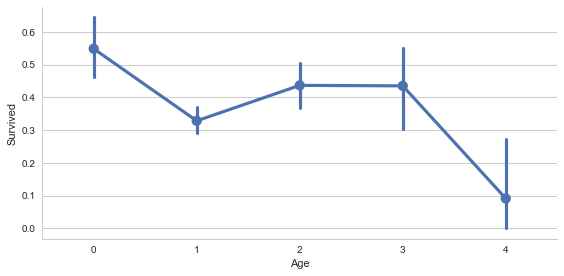

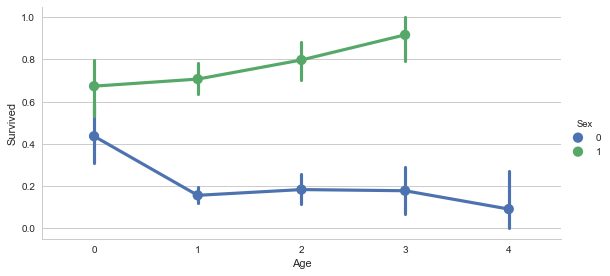

In [53]:
view_feature('Age')

In [54]:
# SibSp

Training dataframe feature [SibSp] has any nulls or missing values: False

Test dataframe feature [SibSp] has any nulls or missing values: False

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


    SibSp  Sex  Survived
0       0    0  0.168203
1       0    1  0.787356
2       1    0  0.310680
3       1    1  0.754717
4       2    0  0.200000
5       2    1  0.769231
6       3    0  0.000000
7       3    1  0.363636
8       4    0  0.083333
9       4    1  0.333333
10      5    0  0.000000
11      5    1  0.000000
12      8    0  0.000000
13      8    1  0.000000


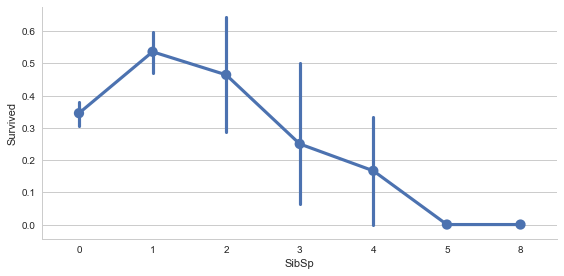

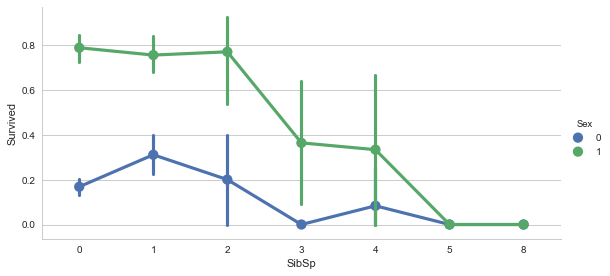

In [55]:
view_feature('SibSp')

Training dataframe feature [Parch] has any nulls or missing values: False

Test dataframe feature [Parch] has any nulls or missing values: False

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


    Parch  Sex  Survived
0       0    0  0.165289
1       0    1  0.788660
2       1    0  0.327586
3       1    1  0.766667
4       2    0  0.322581
5       2    1  0.612245
6       3    0  0.000000
7       3    1  0.750000
8       4    0  0.000000
9       4    1  0.000000
10      5    0  0.000000
11      5    1  0.250000
12      6    1  0.000000


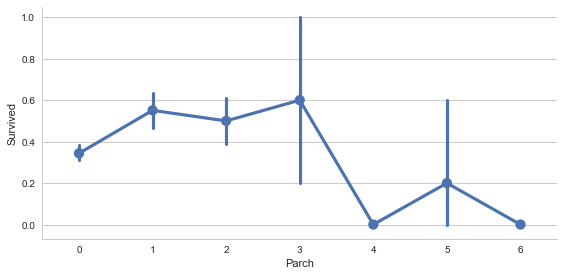

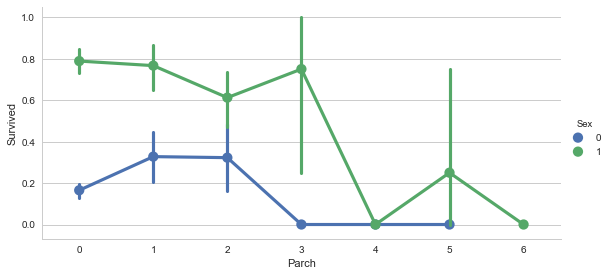

In [56]:
view_feature('Parch')

In [57]:
for _df in _df_combine:
    _df['FamilySize'] = _df['SibSp'] + _df['Parch'] + 1

Training dataframe feature [FamilySize] has any nulls or missing values: False

Test dataframe feature [FamilySize] has any nulls or missing values: False

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


    FamilySize  Sex  Survived
0            1    0  0.155718
1            1    1  0.785714
2            2    0  0.243243
3            2    1  0.816092
4            3    0  0.396226
5            3    1  0.775510
6            4    0  0.500000
7            4    1  0.842105
8            5    0  0.000000
9            5    1  0.250000
10           6    0  0.000000
11           6    1  0.375000
12           7    0  0.250000
13           7    1  0.375000
14           8    0  0.000000
15           8    1  0.000000
16          11    0  0.000000
17          11    1  0.000000


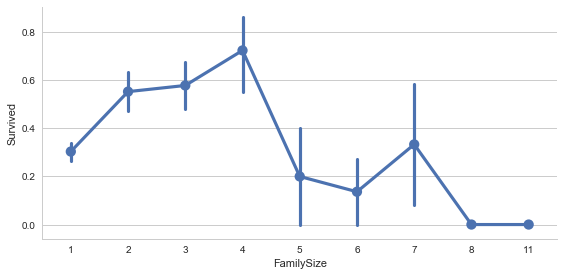

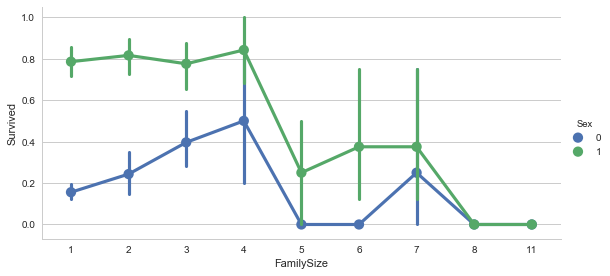

In [58]:
view_feature('FamilySize')

In [59]:
for _df in _df_combine:
    _df['IsAlone'] = 0
    _df.loc[_df['FamilySize'] == 1, 'IsAlone'] = 1

Training dataframe feature [IsAlone] has any nulls or missing values: False

Test dataframe feature [IsAlone] has any nulls or missing values: False

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


   IsAlone  Sex  Survived
0        0    0  0.271084
1        0    1  0.712766
2        1    0  0.155718
3        1    1  0.785714


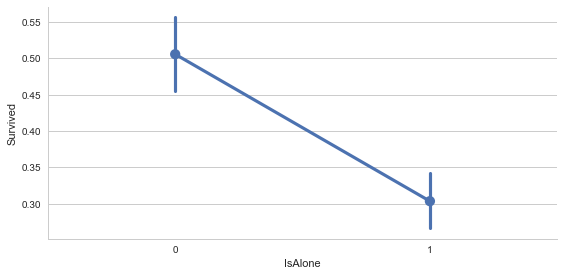

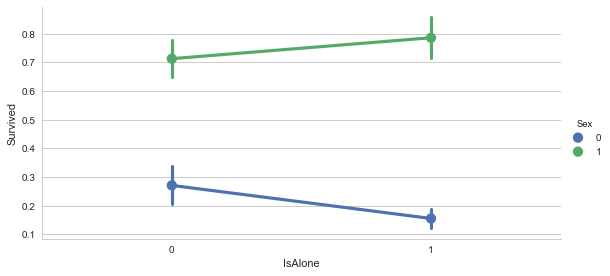

In [60]:
view_feature('IsAlone')

In [61]:
print_shape()
_df_train = _df_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
_df_test = _df_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
_df_combine = [_df_train, _df_test]
print_shape()

_df_train: (891, 13), _df_test: (418, 13), _df_combine[0]:(891, 13), _df_combine[1]:(418, 13)
_df_train: (891, 10), _df_test: (418, 10), _df_combine[0]:(891, 10), _df_combine[1]:(418, 10)


In [62]:
# Ticket

In [63]:
null_check('Ticket')

Training dataframe feature [Ticket] has any nulls or missing values: False

Test dataframe feature [Ticket] has any nulls or missing values: False



Training dataframe feature [Ticket] has any nulls or missing values: False

Test dataframe feature [Ticket] has any nulls or missing values: False

                Ticket  Survived
0               110152  1.000000
1               110413  0.666667
2               110465  0.000000
3               110564  1.000000
4               110813  1.000000
5               111240  0.000000
6               111320  0.000000
7               111361  1.000000
8               111369  1.000000
9               111426  1.000000
10              111427  1.000000
11              111428  1.000000
12              112050  0.000000
13              112052  0.000000
14              112053  1.000000
15              112058  0.000000
16              112059  0.000000
17              112277  1.000000
18              112379  0.000000
19              113028  0.000000
20              113043  0.000000
21              113050  0.000000
22              113051  0.000000
23              113055  1.000000
24              113056  0.0

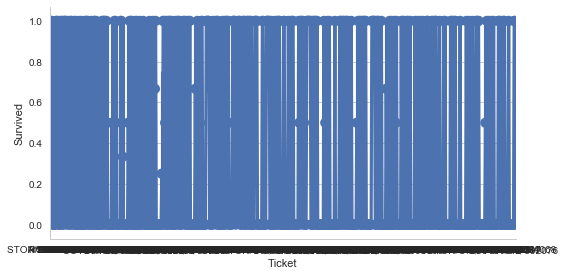

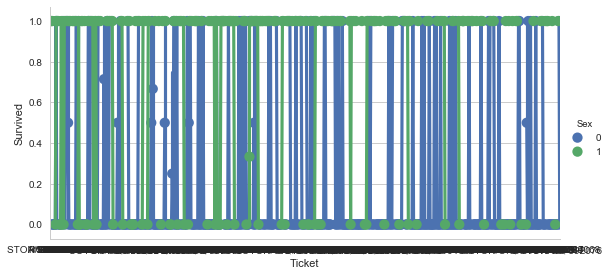

In [64]:
view_feature('Ticket')

In [65]:
print_shape()
_df_train = _df_train.drop(['Ticket'], axis = 1)
_df_test = _df_test.drop(['Ticket'], axis = 1)
_df_combine = [_df_train, _df_test]
print_shape()

_df_train: (891, 10), _df_test: (418, 10), _df_combine[0]:(891, 10), _df_combine[1]:(418, 10)
_df_train: (891, 9), _df_test: (418, 9), _df_combine[0]:(891, 9), _df_combine[1]:(418, 9)


In [66]:
# Fare

Training dataframe feature [Fare] has any nulls or missing values: False

Test dataframe feature [Fare] has any nulls or missing values: True

         Fare  Survived
0      0.0000  0.066667
1      4.0125  0.000000
2      5.0000  0.000000
3      6.2375  0.000000
4      6.4375  0.000000
5      6.4500  0.000000
6      6.4958  0.000000
7      6.7500  0.000000
8      6.8583  0.000000
9      6.9500  0.000000
10     6.9750  0.500000
11     7.0458  0.000000
12     7.0500  0.000000
13     7.0542  0.000000
14     7.1250  0.000000
15     7.1417  1.000000
16     7.2250  0.250000
17     7.2292  0.266667
18     7.2500  0.076923
19     7.3125  0.000000
20     7.4958  0.333333
21     7.5208  0.000000
22     7.5500  0.250000
23     7.6292  0.000000
24     7.6500  0.250000
25     7.7250  0.000000
26     7.7292  0.000000
27     7.7333  0.500000
28     7.7375  0.500000
29     7.7417  0.000000
..        ...       ...
218   80.0000  1.000000
219   81.8583  1.000000
220   82.1708  0.500000
221   83.1583  1.

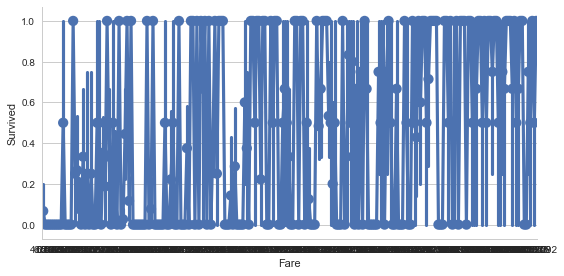

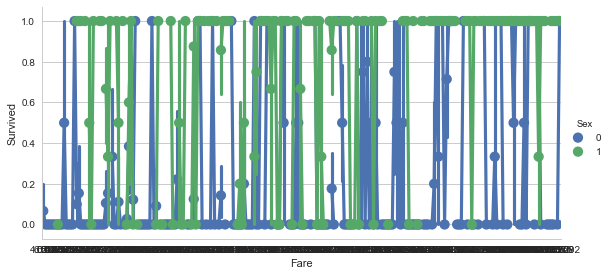

In [67]:
view_feature('Fare')

In [68]:
_df_test['Fare'].fillna(_df_test['Fare'].dropna().median(), inplace = True)

In [69]:
null_check('Fare')

Training dataframe feature [Fare] has any nulls or missing values: False

Test dataframe feature [Fare] has any nulls or missing values: False



In [70]:
_df_train['FareBand'] = pandas.qcut(_df_train['Fare'], 4)

In [71]:
_df_test['FareBand'] = pandas.qcut(_df_test['Fare'], 4)

Training dataframe feature [FareBand] has any nulls or missing values: False

Test dataframe feature [FareBand] has any nulls or missing values: False

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


          FareBand  Sex  Survived
0   (-0.001, 7.91]    0  0.077778
1   (-0.001, 7.91]    1  0.697674
2   (7.91, 14.454]    0  0.159236
3   (7.91, 14.454]    1  0.641791
4   (14.454, 31.0]    0  0.279070
5   (14.454, 31.0]    1  0.698925
6  (31.0, 512.329]    0  0.306306
7  (31.0, 512.329]    1  0.855856


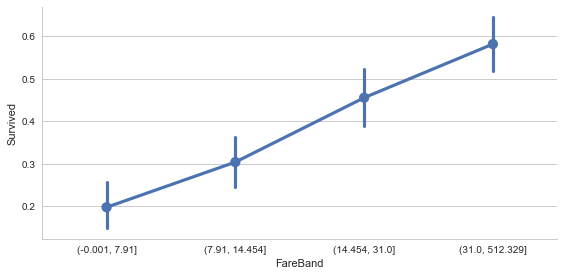

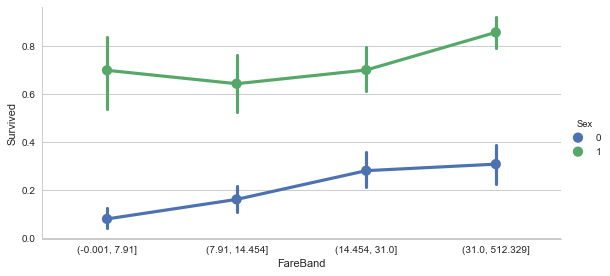

In [72]:
view_feature('FareBand')

In [73]:
_df_test['FareBand'].unique()

[(-0.001, 7.896], (7.896, 14.454], (14.454, 31.472], (31.472, 512.329]]
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]

In [74]:
for _df in _df_combine:
    _df.loc[ _df['Fare'] <= 7.91, 'Fare'] = 0
    _df.loc[(_df['Fare'] > 7.91) & (_df['Fare'] <= 14.454), 'Fare'] = 1
    _df.loc[(_df['Fare'] > 14.454) & (_df['Fare'] <= 31), 'Fare']   = 2
    _df.loc[ _df['Fare'] > 31, 'Fare'] = 3
    _df['Fare'] = _df['Fare'].astype(int)

In [75]:
print_shape()
_df_train = _df_train.drop(['FareBand'], axis = 1)
_df_test = _df_test.drop(['FareBand'], axis = 1)
_df_combine = [_df_train, _df_test]
print_shape()

_df_train: (891, 10), _df_test: (418, 10), _df_combine[0]:(891, 10), _df_combine[1]:(418, 10)
_df_train: (891, 9), _df_test: (418, 9), _df_combine[0]:(891, 9), _df_combine[1]:(418, 9)


In [76]:
# Cabin

Training dataframe feature [Cabin] has any nulls or missing values: True

Test dataframe feature [Cabin] has any nulls or missing values: True

     Cabin  Survived
0      A10  0.000000
1      A14  0.000000
2      A16  1.000000
3      A19  0.000000
4      A20  1.000000
5      A23  1.000000
6      A24  0.000000
7      A26  1.000000
8      A31  1.000000
9      A32  0.000000
10     A34  1.000000
11     A36  0.000000
12      A5  0.000000
13      A6  1.000000
14      A7  0.000000
15    B101  1.000000
16    B102  0.000000
17     B18  1.000000
18     B19  0.000000
19     B20  1.000000
20     B22  0.500000
21     B28  1.000000
22      B3  1.000000
23     B30  0.000000
24     B35  1.000000
25     B37  0.000000
26     B38  0.000000
27     B39  1.000000
28      B4  1.000000
29     B41  1.000000
..     ...       ...
117    E12  1.000000
118   E121  1.000000
119    E17  1.000000
120    E24  1.000000
121    E25  1.000000
122    E31  0.000000
123    E33  1.000000
124    E34  1.000000
125    E36  1.00

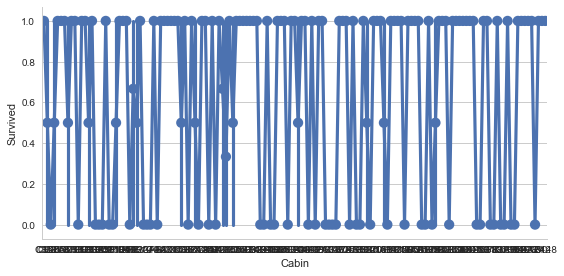

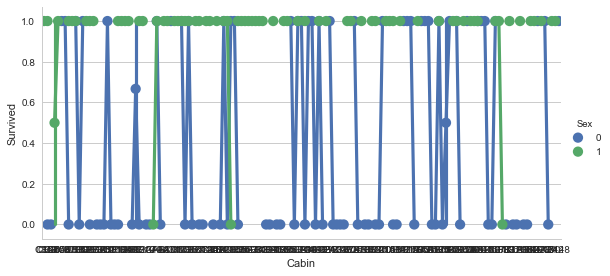

In [77]:
view_feature('Cabin')

In [78]:
print_shape()
_df_train = _df_train.drop(['Cabin'], axis = 1)
_df_test = _df_test.drop(['Cabin'], axis = 1)
_df_combine = [_df_train, _df_test]
print_shape()

_df_train: (891, 9), _df_test: (418, 9), _df_combine[0]:(891, 9), _df_combine[1]:(418, 9)
_df_train: (891, 8), _df_test: (418, 8), _df_combine[0]:(891, 8), _df_combine[1]:(418, 8)


In [79]:
# Embarked

In [80]:
null_check('Embarked')

Training dataframe feature [Embarked] has any nulls or missing values: True

Test dataframe feature [Embarked] has any nulls or missing values: False



In [81]:
for _df in _df_combine:
    _df['Embarked'] = _df['Embarked'].fillna('S')

In [82]:
for _df in _df_combine:
    _df['Embarked'] = _df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

Training dataframe feature [Embarked] has any nulls or missing values: False

Test dataframe feature [Embarked] has any nulls or missing values: False

   Embarked  Survived
0         0  0.339009
1         1  0.553571
2         2  0.389610


   Embarked  Sex  Survived
0         0    0  0.174603
1         0    1  0.692683
2         1    0  0.305263
3         1    1  0.876712
4         2    0  0.073171
5         2    1  0.750000


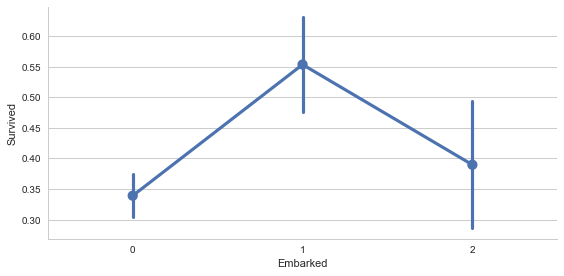

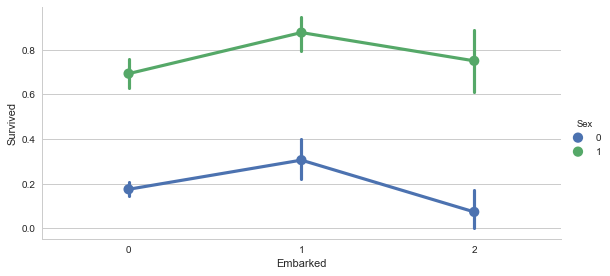

In [83]:
view_feature('Embarked')

In [84]:
_df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,4.0,0
1,1,1,1,2,3,1,3.0,0
2,1,3,1,1,1,0,2.0,1
3,1,1,1,2,3,0,3.0,0
4,0,3,0,2,1,0,4.0,1


In [85]:
_df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,4.0,1
1,893,3,1,3,0,0,3.0,0
2,894,2,0,4,1,2,4.0,1
3,895,3,0,1,1,0,4.0,1
4,896,3,1,1,1,0,3.0,0


In [86]:
# prepare data

In [87]:
_array = _df_train.values

In [88]:
print(_array[:5,:], len(_array), type(_array), _array.shape, _array.ndim, _array.dtype.name)

[[ 0.  3.  0.  1.  0.  0.  4.  0.]
 [ 1.  1.  1.  2.  3.  1.  3.  0.]
 [ 1.  3.  1.  1.  1.  0.  2.  1.]
 [ 1.  1.  1.  2.  3.  0.  3.  0.]
 [ 0.  3.  0.  2.  1.  0.  4.  1.]] 891 <class 'numpy.ndarray'> (891, 8) 2 float64


In [89]:
_X = _array[:,1:8]

In [90]:
print(_X[:5,:], len(_X), type(_X), _X.shape, _X.ndim, _X.dtype.name)

[[ 3.  0.  1.  0.  0.  4.  0.]
 [ 1.  1.  2.  3.  1.  3.  0.]
 [ 3.  1.  1.  1.  0.  2.  1.]
 [ 1.  1.  2.  3.  0.  3.  0.]
 [ 3.  0.  2.  1.  0.  4.  1.]] 891 <class 'numpy.ndarray'> (891, 7) 2 float64


In [91]:
_y = _array[:,0:1]

In [92]:
print(_y[:5,:], len(_y), type(_y), _y.shape, _y.ndim, _y.dtype.name)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]] 891 <class 'numpy.ndarray'> (891, 1) 2 float64


In [93]:
_y = numpy.ravel(_y)

In [94]:
print(_y[:5], len(_y), type(_y), _y.shape, _y.ndim, _y.dtype.name)

[ 0.  1.  1.  1.  0.] 891 <class 'numpy.ndarray'> (891,) 1 float64


In [95]:
# Splitting data into training and validation sets

In [96]:
_test_size = 20

In [97]:
_random_seed = 7

In [98]:
_X_train, _X_val, _y_train, _y_val = train_test_split(_X, _y, test_size=_test_size, random_state=_random_seed)

In [99]:
print(_X_train, len(_X_train), type(_X_train), _X_train.shape, _X_train.ndim, _X_train.dtype.name)

[[ 1.  0.  1. ...,  1.  4.  1.]
 [ 3.  0.  1. ...,  0.  4.  1.]
 [ 1.  0.  4. ...,  0.  4.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  2.  1.]
 [ 3.  0.  1. ...,  2.  4.  1.]
 [ 3.  0.  1. ...,  0.  4.  0.]] 871 <class 'numpy.ndarray'> (871, 7) 2 float64


In [100]:
print(_X_val, len(_X_val), type(_X_val), _X_val.shape, _X_val.ndim, _X_val.dtype.name)

[[ 3.  0.  1.  1.  0.  4.  1.]
 [ 2.  0.  1.  1.  0.  4.  0.]
 [ 3.  0.  2.  1.  0.  4.  1.]
 [ 3.  0.  1.  2.  2.  4.  0.]
 [ 1.  1.  1.  3.  0.  2.  1.]
 [ 2.  1.  2.  1.  0.  2.  1.]
 [ 3.  0.  1.  0.  2.  4.  1.]
 [ 3.  0.  2.  0.  0.  4.  1.]
 [ 2.  0.  1.  1.  0.  4.  1.]
 [ 1.  1.  3.  3.  1.  3.  0.]
 [ 2.  1.  1.  2.  0.  3.  0.]
 [ 3.  0.  0.  3.  0.  1.  0.]
 [ 2.  1.  2.  2.  0.  3.  0.]
 [ 2.  1.  0.  2.  0.  2.  0.]
 [ 3.  0.  1.  1.  0.  4.  1.]
 [ 3.  0.  1.  0.  2.  4.  1.]
 [ 3.  0.  1.  0.  1.  4.  1.]
 [ 2.  0.  1.  0.  0.  4.  1.]
 [ 3.  0.  2.  1.  0.  4.  0.]
 [ 2.  0.  1.  1.  0.  4.  1.]] 20 <class 'numpy.ndarray'> (20, 7) 2 float64


In [101]:
print(_y_train[0:5], len(_y_train), type(_y_train), _y_train.shape, _y_train.ndim, _y_train.dtype.name)

[ 1.  0.  1.  1.  0.] 871 <class 'numpy.ndarray'> (871,) 1 float64


In [102]:
print(_y_val[0:5], len(_y_val), type(_y_val), _y_val.shape, _y_val.ndim, _y_val.dtype.name)

[ 0.  0.  0.  0.  1.] 20 <class 'numpy.ndarray'> (20,) 1 float64


In [103]:
# Evaluate algorithms - baseline

In [104]:
_num_folds = 10

In [105]:
_scoring = 'accuracy'

In [106]:
# spot check algorithms

In [107]:
_models = []

# linear algorithms
_models.append(('LR', LogisticRegression())) 
_models.append(('LDA', LinearDiscriminantAnalysis())) 
_models.append(('P', Perceptron()))
_models.append(('SGD', SGDClassifier()))
_models.append(('LSVC', LinearSVC()))

# non-linear algorithms
_models.append(('KNN', KNeighborsClassifier())) 
_models.append(('CART', DecisionTreeClassifier())) 
_models.append(('NB', GaussianNB())) 
_models.append(('SVM', SVC()))

In [108]:
_results = []
_names = []

for _name, _model in _models:
    _kfold = KFold(n_splits=_num_folds, random_state=_random_seed)
    _cv_results = cross_val_score(_model, _X_train, _y_train, cv=_kfold, scoring=_scoring)
    _results.append(_cv_results)
    _names.append(_name)
    _msg = '{}: {:.3%}, {:.3f}'.format(_name, _cv_results.mean(), _cv_results.std())
    print(_msg)

LR: 79.340%, 0.048
LDA: 79.688%, 0.055
P: 75.205%, 0.050
SGD: 72.220%, 0.104
LSVC: 79.803%, 0.056
KNN: 81.289%, 0.041
CART: 81.290%, 0.037
NB: 77.850%, 0.050
SVM: 81.408%, 0.049


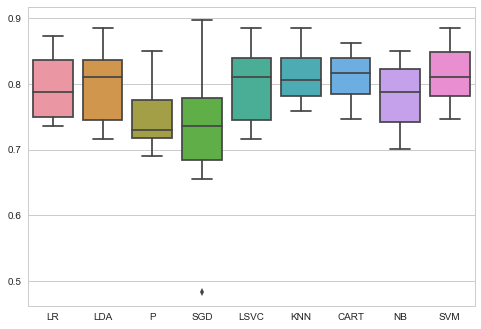

In [109]:
seaborn.boxplot(_names, _results)

In [110]:
# Ensemble methods

In [111]:
# ensembles
ensembles = []

# boosting methods
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 

# bagging methods
ensembles.append(('RF', RandomForestClassifier())) 
ensembles.append(('ET', ExtraTreesClassifier()))

In [112]:
_results_en = []
_names_en = []

for _name, _model in ensembles:
    _kfold = KFold(n_splits=_num_folds, random_state=_random_seed)
    _cv_results = cross_val_score(_model, _X_train, _y_train, cv=_kfold, scoring=_scoring)
    _results_en.append(_cv_results)
    _names_en.append(_name)
    _msg = '{}: {:.3%}, {:.3f}'.format(_name, _cv_results.mean(), _cv_results.std())
    print(_msg)

AB: 79.799%, 0.046
GBM: 80.598%, 0.037
RF: 81.637%, 0.037
ET: 80.717%, 0.038


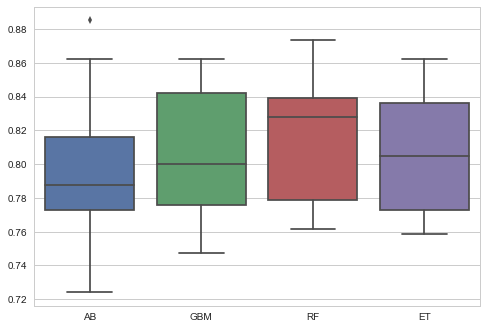

In [140]:
seaborn.boxplot(x=_names_en, y=_results_en)

In [141]:
# validate
_model_val = RandomForestClassifier()
_model_val.fit(_X_train, _y_train)

# estimate accuracy on val data
_pred = _model_val.predict(_X_val)
print(accuracy_score(_y_val, _pred))
print(confusion_matrix(_y_val, _pred))
print(classification_report(_y_val, _pred))

0.95
[[14  1]
 [ 0  5]]
             precision    recall  f1-score   support

        0.0       1.00      0.93      0.97        15
        1.0       0.83      1.00      0.91         5

avg / total       0.96      0.95      0.95        20



In [142]:
_df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,4.0,1
1,893,3,1,3,0,0,3.0,0
2,894,2,0,4,1,2,4.0,1
3,895,3,0,1,1,0,4.0,1
4,896,3,1,1,1,0,3.0,0


In [143]:
_arr_test = _df_test.values

In [144]:
print_ndim_array(_arr_test)

[[ 892.    3.    0.    2.    0.    2.    4.    1.]
 [ 893.    3.    1.    3.    0.    0.    3.    0.]
 [ 894.    2.    0.    4.    1.    2.    4.    1.]
 [ 895.    3.    0.    1.    1.    0.    4.    1.]
 [ 896.    3.    1.    1.    1.    0.    3.    0.]] 418 <class 'numpy.ndarray'> (418, 8) 2 float64


In [145]:
_X_test = _arr_test[:,1:]

In [146]:
print_ndim_array(_X_test)

[[ 3.  0.  2.  0.  2.  4.  1.]
 [ 3.  1.  3.  0.  0.  3.  0.]
 [ 2.  0.  4.  1.  2.  4.  1.]
 [ 3.  0.  1.  1.  0.  4.  1.]
 [ 3.  1.  1.  1.  0.  3.  0.]] 418 <class 'numpy.ndarray'> (418, 7) 2 float64


In [147]:
_pred_test = (_model_val.predict(_X_test)).astype(int)

In [148]:
print_1dim_array(_pred_test)

[0 0 0 0 1] 418 <class 'numpy.ndarray'> (418,) 1 int64


In [149]:
_passenger_id = _arr_test[:,0:1]

In [150]:
print_ndim_array(_passenger_id)

[[ 892.]
 [ 893.]
 [ 894.]
 [ 895.]
 [ 896.]] 418 <class 'numpy.ndarray'> (418, 1) 2 float64


In [151]:
_passenger_id = numpy.ravel(_passenger_id.astype(int))

In [152]:
print_1dim_array(_passenger_id)

[892 893 894 895 896] 418 <class 'numpy.ndarray'> (418,) 1 int64


In [153]:
_gender_submission = pandas.DataFrame({'PassengerId':_passenger_id, 'Survived':_pred_test})

In [154]:
_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [156]:
_gender_submission.to_csv('gender_submission.csv', index = False)